In [ ]:
import pandas as pd
import os 
import numpy as np


In [ ]:
def labels_conversion(row):
    flag = 0
    # NC
    if row['NACCUDSD'] == 1:
        row['NC'] = 1
    else:
        row['NC'] = 0

    # IMCI
    if row['NACCUDSD'] == 2:
        row['IMCI'] = 1
    else:
        row['IMCI'] = 0

    # MCI
    if row['NACCUDSD'] == 3:
        row['MCI'] = 1
    else:
        row['MCI'] = 0
    
    # DE
    if row['NACCUDSD'] == 4:
        row['DE'] = 1
    else:
        row['DE'] = 0 

    # AD
    if ((row['NACCALZP'] == 1) | (row['NACCALZP'] == 2)) & (row['NACCUDSD'] == 4):
        flag = 1
        row['AD'] = 1
    else:
        row['AD'] = 0

    # PD
    if row['PARK'] == 1:
        row['ParkinsonsD'] = 1
    else:
        row['ParkinsonsD'] = 0

    # LBD
    if ((row['NACCLBDP'] == 1) | (row['NACCLBDP'] == 2)) & (row['NACCUDSD'] == 4):
        flag = 1
        row['LBD'] = 1
    else:
        row['LBD'] = 0

    # VD
    if (((row['CVDIF'] == 1) | (row['CVDIF'] == 2)) | ((row['VASCIF'] == 1) | (row['VASCIF'] == 2)) | ((row['VASCPSIF'] == 1) | (row['VASCPSIF'] == 2)) | ((row['STROKIF'] == 1) | (row['STROKIF'] == 2))) & (row['NACCUDSD'] == 4):
        flag = 1
        row['VD'] = 1
    else:
        row['VD'] = 0

    ## SVAD Signs
    if row['SIVDFIND'] == 1:
        row['SVAD'] = 1
    else:
        row['SVAD'] = 0

    # PCA - posterior corical atrophy
    if row['PCA'] == 1:
        row['POSTERIOR_ATRO'] = 1
    else:
        row['POSTERIOR_ATRO'] = 0

    # Prion disease (CJD, other)
    if ((row['PRIONIF'] == 1) | (row['PRIONIF'] == 2)) & (row['NACCUDSD'] == 4):
        flag = 1
        row['PRD'] = 1
    else:
        row['PRD'] = 0

    # FTLD and its variants, including CBD and PSP, and with or without ALS
    if (((row['FTLDNOIF'] == 1) | (row['FTLDNOIF'] == 2)) | ((row['FTDIF'] == 1) | (row['FTDIF'] == 2)) | ((row['FTLDMOIF'] == 1) | (row['FTLDMOIF'] == 2)) | ((row['PPAPHIF'] == 1) | (row['PPAPHIF'] == 2)) | ((row['PSPIF'] == 1) | (row['PSPIF'] == 2)) | ((row['CORTIF'] == 1) | (row['CORTIF'] == 2))) & (row['NACCUDSD'] == 4):
        flag = 1
        row['FTD_ANY'] = 1
    else:
        row['FTD_ANY'] = 0

    ##### ---- FTD SUBTYPES ---- ########
    if ((row['FTDIF'] == 1) | (row['FTDIF'] == 2)) & (row['NACCUDSD'] == 4):
        row['bvFTD'] = 1
    else:
        row['bvFTD'] = 0

    if ((row['PPAPHIF'] == 1) | (row['PPAPHIF'] == 2)) & (row['NACCUDSD'] == 4):
        row['PPA_ANY'] = 1
    else:
        row['PPA_ANY'] = 0

    if row['NACCPPME'] == 1:
        row['nfvPPA'] = 1
    elif row['NACCPPME'] == 2:
        row['svPPA'] = 1
    else:
        row['nfvPPA'] = 0
        row['svPPA'] = 0
    ##### ---- FTD SUBTYPES ---- ########

    # NPH
    if ((row['HYCEPHIF'] == 1) | (row['HYCEPHIF'] == 2)) & (row['NACCUDSD'] == 4):
        flag = 1
        row['NPH'] = 1
    else:
        row['NPH'] = 0
    

    # Infectious (HIV included), metabolic, substance abuse / alcohol, medications, systemic disease, delirium (Systemic and External Factors)
    if (((row['OTHCOGIF'] == 1) | (row['OTHCOGIF'] == 2)) | ((row['HIVIF'] == 1) | (row['HIVIF'] == 2)) | ((row['ALCDEMIF'] == 1) | (row['ALCDEMIF'] == 2)) | ((row['IMPSUBIF'] == 1) | (row['IMPSUBIF'] == 2)) | ((row['DYSILLIF'] == 1) | (row['DYSILLIF'] == 2)) | ((row['MEDSIF'] == 1) | (row['MEDSIF'] == 2)) | ((row['DELIRIF'] == 1) | (row['DELIRIF'] == 2))) & (row['NACCUDSD'] == 4):
        flag = 1
        row['SEF'] = 1
    else:
        row['SEF'] = 0

    
    # Psychiatric including schizophrenia, depression, bipolar, anxiety, PTSD
    if (((row['DEPIF'] == 1) | (row['DEPIF'] == 2)) | ((row['BIPOLDIF'] == 1) | (row['BIPOLDIF'] == 2)) | ((row['SCHIZOIF'] == 1) | (row['SCHIZOIF'] == 2)) | ((row['ANXIETIF'] == 1) | (row['ANXIETIF'] == 2)) | ((row['PTSDDXIF'] == 1) | (row['PTSDDXIF'] == 2)) | ((row['OTHPSYIF'] == 1) | (row['OTHPSYIF'] == 2))) & (row['NACCUDSD'] == 4):
        flag = 1
        row['PSY'] = 1
    else:
        row['PSY'] = 0

    # TBI
    if ((row['BRNINJIF'] == 1) | (row['BRNINJIF'] == 2)) & (row['NACCUDSD'] == 4):
        flag = 1
        row['TBI'] = 1
    else:
        row['TBI'] = 0

    # OTHER
    if  (row['NACCUDSD'] == 4) & ((flag == 0) | ((row['MSAIF'] == 1) | (row['MSAIF'] == 2)) | ((row['ESSTREIF'] == 1) | (row['ESSTREIF'] == 2)) | ((row['DOWNSIF'] == 1) | (row['DOWNSIF'] == 2)) | ((row['HUNTIF'] == 1) | (row['HUNTIF'] == 2)) | ((row['EPILEPIF'] == 1) | (row['EPILEPIF'] == 2)) | ((row['NEOPIF'] == 1) | (row['NEOPIF'] == 2)) | ((row['DEMUNIF'] == 1) | (row['DEMUNIF'] == 2)) | ((row['COGOTHIF'] == 1) | (row['COGOTHIF'] == 2)) | ((row['COGOTH2F'] == 1) | (row['COGOTH2F'] == 2)) | ((row['COGOTH3F'] == 1) | (row['COGOTH3F'] == 2))):
        row['ODE'] = 1
    else:
        row['ODE'] = 0
        
    
    return row

In [ ]:
## NACC match VA subjects to other pathological information ##
# nacc_comm_df = pd.read_csv('Z:/1_combined/NACC_NEW/ORIG/DEMO/Commercial_Data/commercial_ftldlbd_nacc71.csv')
nacc_inv_df = pd.read_csv('Z:/1_combined/NACC_NEW/ORIG/DEMO/Non_Commercial_Data/investigator_ftldlbd_nacc71.csv')

In [ ]:
nacc_mri_vol_df = pd.read_csv('Z:/1_combined/NACC_NEW/ORIG/DEMO/Non_Commercial_Data/investigator_mri_nacc71.csv')
nacc_mri_vol_df = nacc_mri_vol_df[['NACCID', 'NACCVNUM' ,'NACCICV','LINFPAR', 'RINFPAR', 'LINFTEMP', 'RINFTEMP', 'LISTHC', 'RISTHC', 'LMIDTEMP', 'RMIDTEMP', 'LPOSCIN', 'RPOSCIN']]
nacc_mri_vol_df = nacc_mri_vol_df[~nacc_mri_vol_df.isin([88.8888, 99.9999]).any(axis=1)]
print(nacc_mri_vol_df.shape)

In [ ]:
nacc_va_df = pd.read_csv('C:/Users/WooSikKim/Desktop/Research/projects/co_pathology/scripts/stage_copath/data/nacc/260120_NACC_VA_TAU_matched.csv')
merged_df = pd.merge(nacc_va_df, nacc_inv_df, on=['NACCID', 'NACCVNUM', 'NACCAGEB', 'NACCAGE', 'SEX', 'EDUC', 'NACCMMSE', 'NACCNE4S'], how='left')
merged_df_converted = merged_df.apply(labels_conversion, axis=1)
# merged_df_converted = pd.merge(merged_df_converted, nacc_mri_vol_df, on=['NACCID'], how='outer')

In [53]:
base_cols = [
    'NACCID', 'NACCVNUM', 'subject_id',
    'NACCAGEB', 'NACCAGE', 'SEX', 'EDUC',
    'NACCMMSE', 'NACCNE4S', 'DX', 'TAU/SCANDATE', 'TAU/PROCESSDATE', 'TAU/TRACER', 'TAU/META_TEMPORAL_SUVR'
]
tau_cols = merged_df.loc[:, 'TAU/CTX_LH_BANKSSTS_SUVR':'TAU/CTX_RH_TRANSVERSETEMPORAL_SUVR'].columns.tolist()
va_cols = merged_df_converted.loc[:, 'VA/2':'VA/2035'].columns.tolist()
pathology_cols = merged_df_converted.loc[:, 'NC':'ODE'].columns.tolist()

selected_columns = base_cols + tau_cols + va_cols + pathology_cols

final_df = merged_df_converted[selected_columns]
final_df = final_df.rename(columns={"ParkinsonsD" : "PD", "POSTERIOR_ATRO":"PCA"})
# final_df.to_csv('C:/Users/WooSikKim/Desktop/Research/projects/co_pathology/scripts/stage_copath/data/nacc/260203_NACC_VA_TAU_PATH_matched.csv', index=False)

**volume_weighted_mtl_neo**

In [54]:
import nibabel as nib
dk_atlas = nib.load('C:/Users/WooSikKim/Desktop/Research/brain_atlases/MIITRA/DesikanKilliany-1mm/DesikanKilliany-1mm.nii.gz').get_fdata()

mtl = [1006, 2006]
neo = [1008, 1008, 1010, 1015, 1023,
       2008, 2009, 2010, 2015, 2023]

label_to_col = {
       1006: 'TAU/CTX_LH_ENTORHINAL_SUVR',
       2006: 'TAU/CTX_RH_ENTORHINAL_SUVR',
       1008: 'TAU/CTX_LH_INFERIORPARIETAL_SUVR',
       2008: 'TAU/CTX_RH_INFERIORPARIETAL_SUVR',
       1009: 'TAU/CTX_LH_INFERIORTEMPORAL_SUVR',
       2009: 'TAU/CTX_RH_INFERIORTEMPORAL_SUVR',
       1010: 'TAU/CTX_LH_ISTHMUSCINGULATE_SUVR',
       2010: 'TAU/CTX_RH_ISTHMUSCINGULATE_SUVR',
       1015: 'TAU/CTX_LH_MIDDLETEMPORAL_SUVR',
       2015: 'TAU/CTX_RH_MIDDLETEMPORAL_SUVR',
       1023: 'TAU/CTX_LH_POSTERIORCINGULATE_SUVR',
       2023: 'TAU/CTX_RH_POSTERIORCINGULATE_SUVR'
}

labels, counts = np.unique(dk_atlas, return_counts=True)
voxel_counts = dict(zip(labels, counts))

def volume_weighted_roi_mean(row, labels, label_to_col, voxel_counts):
       values = []
       weights = []
       for lbl in labels:
              print(lbl)
              col = label_to_col[lbl]
              # print(col)
              if col in row:
                     values.append(row[col])
                     weights.append(voxel_counts[lbl])
       if len(values) == 0:
              return np.nan
       print(values)
       return np.average(values, weights=weights)

final_df['TAU/MTL_SUVR'] = final_df.apply(
       volume_weighted_roi_mean,
       axis=1,
       labels=mtl,
       label_to_col=label_to_col,
       voxel_counts=voxel_counts
)

final_df['TAU/NEO_SUVR'] = final_df.apply(
       volume_weighted_roi_mean,
       axis=1,
       labels=neo,
       label_to_col=label_to_col,
       voxel_counts=voxel_counts
)
final_df.to_csv('C:/Users/WooSikKim/Desktop/Research/projects/co_pathology/scripts/stage_copath/data/nacc/260203_NACC_VA_TAU_PATH_matched.csv', index=False)

1006
2006
[nan, nan]
1006
2006
[nan, nan]
1006
2006
[nan, nan]
1006
2006
[nan, nan]
1006
2006
[nan, nan]
1006
2006
[nan, nan]
1006
2006
[nan, nan]
1006
2006
[nan, nan]
1006
2006
[nan, nan]
1006
2006
[nan, nan]
1006
2006
[nan, nan]
1006
2006
[1.197, 1.138]
1006
2006
[nan, nan]
1006
2006
[nan, nan]
1006
2006
[nan, nan]
1006
2006
[1.288, 1.451]
1006
2006
[1.713, 1.852]
1006
2006
[1.063, 1.046]
1006
2006
[nan, nan]
1006
2006
[nan, nan]
1006
2006
[nan, nan]
1006
2006
[nan, nan]
1006
2006
[nan, nan]
1006
2006
[nan, nan]
1006
2006
[nan, nan]
1006
2006
[nan, nan]
1006
2006
[nan, nan]
1006
2006
[nan, nan]
1006
2006
[nan, nan]
1006
2006
[nan, nan]
1006
2006
[nan, nan]
1006
2006
[nan, nan]
1006
2006
[nan, nan]
1006
2006
[nan, nan]
1006
2006
[1.566, 1.647]
1006
2006
[nan, nan]
1006
2006
[1.307, 1.351]
1006
2006
[1.286, 1.344]
1006
2006
[nan, nan]
1006
2006
[0.935, 1.299]
1006
2006
[nan, nan]
1006
2006
[nan, nan]
1006
2006
[nan, nan]
1006
2006
[1.304, 1.368]
1006
2006
[nan, nan]
1006
2006
[nan, nan

In [55]:
from sklearn.mixture import GaussianMixture
# final_df = final_df.dropna(subset=['TAU/NEO_SUVR'])

def gmm_tau(df,col_name,col_z_name):
    gmm = GaussianMixture(
        n_components=2,
        covariance_type='full',
        random_state=42
    )
#    print(df.dropna(subset=col_name).shape,'col names')
    if df.dropna(subset=[col_name]).shape[0]<2:return
    x = df.dropna(subset=[col_name])[[col_name]].values
    gmm.fit(x)
    mu = gmm.means_.ravel()
    sigma_ = np.sqrt(gmm.covariances_.ravel())
    idx = np.argmin(mu)
    mu1 = mu[idx]
    sigma1 = sigma_[idx]
    df[col_z_name] = (df[col_name] - mu1) / sigma1

gmm_tau(df=final_df, col_name='TAU/MTL_SUVR', col_z_name='TAU/MTL_Z')
gmm_tau(df=final_df, col_name='TAU/NEO_SUVR', col_z_name='TAU/NEO_Z')

final_df["TAU/stage_aa_gt"] = np.select(
    [
        (final_df["TAU/MTL_Z"] < 2) & (final_df["TAU/NEO_Z"] < 2),
        (final_df["TAU/MTL_Z"] >= 2) & (final_df["TAU/NEO_Z"] < 2),
        (final_df["TAU/NEO_Z"] >= 2),
    ],
    [
        "low",
        "mid",
        "high",
    ],
    default=None
)
final_df.to_csv('C:/Users/WooSikKim/Desktop/Research/projects/co_pathology/scripts/stage_copath/data/nacc/260203_NACC_VA_TAU_PATH_matched.csv', index=False)

In [66]:
## AA Stage Confusion Matrix ##
stage_inf_nacc = pd.read_csv('C:/Users/WooSikKim/Desktop/Research/projects/co_pathology/scripts/stage_copath/data/nacc/260203_STAGE_NACC_inference.csv')
stage_inf_nacc = stage_inf_nacc.loc[:,['FULL_ID'] + stage_inf_nacc.loc[:, 'pred_A_P':'pred_tau_stage_aa/mid'].columns.tolist()]
stage_inf_nacc['TAU/stage_aa_pred'] = (
    stage_inf_nacc[['pred_tau_stage_aa/low', 'pred_tau_stage_aa/mid', 'pred_tau_stage_aa/high']]
    .idxmax(axis=1)
    .str.replace('pred_tau_stage_aa/', '', regex=False)
)
stage_final_df = pd.merge(final_df, stage_inf_nacc,
                    left_on = 'subject_id',
                    right_on = 'FULL_ID',
                    how='left'
                    )
stage_final_df = stage_final_df.drop(columns=['FULL_ID'])

stage_final_df = stage_final_df.dropna() ## get rid of all partially mismatching data
stage_final_df.to_csv('C:/Users/WooSikKim/Desktop/Research/projects/co_pathology/scripts/stage_copath/data/nacc/260203_STAGE_PRED_GT_NACC.csv', index=False)

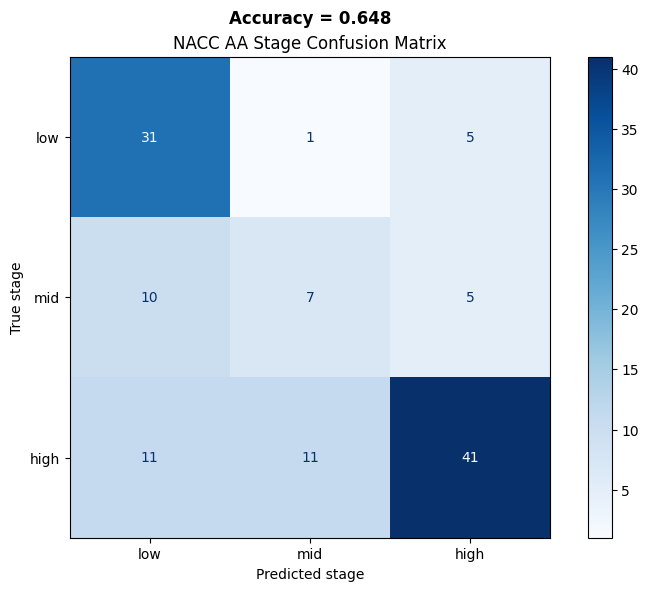

In [89]:
## confusion matrix aa stage ##
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
plot_df = stage_final_df[stage_final_df['DX']!='Unknown']
plot_df = stage_final_df[stage_final_df['DX'].isin(['MCI', 'AD'])]
# plot_df = stage_final_df[stage_final_df['DX'].isin(['CN'])]

acc = accuracy_score(
    plot_df["TAU/stage_aa_gt"],
    plot_df["TAU/stage_aa_pred"]
)

labels = ['low', 'mid', 'high']
cm = confusion_matrix(
    plot_df['TAU/stage_aa_gt'],
    plot_df['TAU/stage_aa_pred'],
    labels=labels
)
fig, ax = plt.subplots(figsize=(8, 6))

disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=labels
)

disp.plot(
    cmap='Blues',
    ax=ax,
    colorbar=True
)

ax.set_xlabel("Predicted stage")
ax.set_ylabel("True stage")
ax.set_title("NACC AA Stage Confusion Matrix")
ax.text(
    0.5, 1.08,
    f"Accuracy = {acc:.3f}",
    transform=ax.transAxes,
    ha="center",
    va="center",
    fontsize=12,
    fontweight="bold"
)

plt.tight_layout()
plt.show()